<a href="https://colab.research.google.com/github/ercefd/heartDisease/blob/main/G19_CENG463_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Fetching the heart disease dataset from the website
!wget -O heart.csv https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2024-11-10 19:22:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart.csv’

heart.csv               [ <=>                ]  18.03K  --.-KB/s    in 0.06s   

2024-11-10 19:22:27 (297 KB/s) - ‘heart.csv’ saved [18461]



In [ ]:
#Reading the dataset
df = pd.read_csv('heart.csv')

In [ ]:
#Naming the Columns
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
#Printing the First 3 values
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [ ]:
#Finding and printing the missing values
missing_values = df[df.isin(['?']).any(axis=1)]
print(missing_values)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
86   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
165  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
191  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
265  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
86     1.0  0.0    ?       0  
165    1.0    ?  3.0       0  
191    2.0    ?  7.0       1  
265    2.0  0.0    ?       2  
286    2.0    ?  7.0       0  
301    1.0    ?  3.0       0  


In [ ]:
#Counting the missing values in each column and representing the missing values with NaN
print(df.isin(['?']).sum())
df = df.replace('?', np.nan)
df = df.astype(float)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


Task 1 Explanation:

In Task 1, we focused on preparing the heart disease dataset for analysis. Here’s what we did and why it matters:

Handling Missing Values:

The dataset had some missing values, shown as '?'. We replaced these with NaN, a standard way to represent missing data. This step is important because it makes it easier to handle these gaps later (e.g., by filling them in or removing affected rows).
Converting Data to Floats:

We made sure all the data is in numeric (float) format. This conversion helps us use the data with machine learning models, which expect numbers rather than text.
Why These Steps Matter:

Cleaning the data by addressing missing values and standardizing the format is essential because models trained on clean data are more accurate and reliable. If we skipped this step, the models might give incorrect results or even fail to run properly.
These initial steps set us up to build effective models in the next tasks. Properly preprocessed data leads to better performance and more meaningful results when we start analyzing and predicting heart disease.

TASK2

In [ ]:
def pearson_correlation(x, y):
  #Calculating the Pearson Correlation depending on the Formula
  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x * y)
  sum_x2 = np.sum(x**2)
  sum_y2 = np.sum(y**2)

  numerator = n * sum_xy - sum_x * sum_y
  denominator = np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

  if denominator == 0:
    return 0
  else:
    return numerator / denominator

In [ ]:
# Calculating Pearson correlations between each feature and the target variable.

y = df['target']
x = df.drop('target', axis=1)
#print(x)
#print(y)
correlations = {}
for features in x.columns:
  #print(x.dtypes)
  correlation = pearson_correlation(x[features], y)
  correlations[features] = correlation
print("Correlations:", correlations)

Correlations: {'age': 0.22580899331365692, 'sex': 0.22660067559370478, 'cp': 0.4051818929782868, 'trestbps': 0.15997763061724385, 'chol': 0.07031461749425665, 'fbs': 0.06593718283244442, 'restecg': 0.18676928429248063, 'thalach': -0.415398985064033, 'exang': 0.3959955651860044, 'oldpeak': 0.5083302157551062, 'slope': 0.3874167161104112, 'ca': 0.5201069602946509, 'thal': 0.5007501174176714}


In [ ]:
# Setting a threshold for feature selection based on correlation.
threshold = 0.3
sc_features = []
for feature, correlation in correlations.items():
  if abs(correlation) > threshold:
    sc_features.append(feature)


print("Selected features:", sc_features)

Selected features: ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
#Finding the highest correlation and most correlated feature
highest_correlation = 0
hc_key = ''
for key, value in correlations.items():
  if abs(value) > highest_correlation:
    highest_correlation = abs(value)
    hc_key = key

most_correlated_feature = hc_key
most_correlated_value = highest_correlation
print("Most correlated feature:", most_correlated_feature, most_correlated_value)

Most correlated feature: ca 0.5201069602946509


# Why we examine
Understanding Relations:

The relationships of the correlation can be used to determine which features will have the most influence over the target variable. A high correlation theoretic value indicates the importance of the feature in predicting the target.

Reducing Redundancy:

When there are many features that are closely related such situations lead to multicollinearity, so that the model becomes difficult to interpret, or unstable. Hence, through the examination of correlations, it is further possible to identify and exclude unnecessary features.

Better Understanding of the Risk Factors:

Since the most correlated features are pinpointed, we explain the risk factors of heart disease. Knowledge of the risk factors can be important for both the health practitioners and the individuals so that they understand the above and manage the risk.

#Advantage

Improved Accuracy:

The use of Such features with high correlation will increase the likelihood of constructing a more accurate model. Such features that are highly correlated have better information and this reduces the complexity of the model in learning and making predictions.

Optimized Model: When a model has less number of features, that model is easier for computational training as well as usage.



Task 2: Explanation

In this task, we calculated the Pearson correlation coefficient between each feature and the target variable to identify the features that have the strongest relationships with the target. Pearson correlation measures the linear relationship between two variables, helping us choose the features that are most relevant to the target.

Steps in the Task:

Calculate Correlations: We calculated the Pearson correlation for each feature with the target variable. This allowed us to see which features have a stronger influence on the target.

Correlation values (examples):

'ca': 0.5208 (strongest positive correlation)
'cp': 0.4051
'thalach': -0.4154 (negative correlation)
Select Important Features: We set a threshold (e.g., 0.3) to select features that have a significant correlation with the target. Features with correlations above this threshold were chosen, resulting in selected features like 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', and 'thal'.

Most Correlated Feature: The feature with the highest correlation to the target was identified as 'ca', with a correlation value of 0.5208.



TASK3

In [ ]:
import numpy as np
def linear_regression(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean)**2)

  b_1 = numerator / denominator #slope
  b_0 = y_mean - b_1 * x_mean #intercept

  return b_0, b_1

In [ ]:
b_0, b_1 = linear_regression(df[most_correlated_feature], df['target'])

print("Intercept (b_0):", b_0)
print("Slope (b_1):",b_1)

Intercept (b_0): 0.48084267051651036
Slope (b_1): 0.6813298247865991


In [ ]:
#y=b_0+b_1*x
simple_y_pred = b_0 + b_1 * df[most_correlated_feature]
#print(predictions)

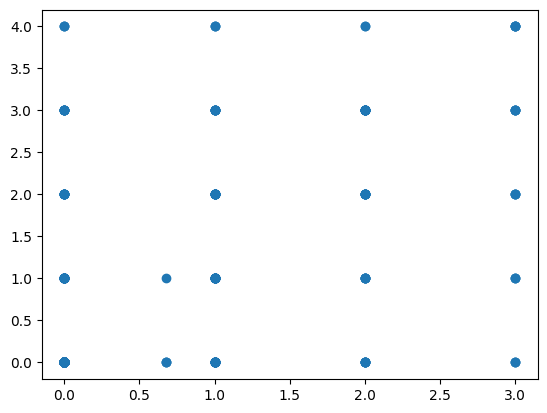

In [ ]:
import matplotlib.pyplot as plt
df = df.fillna(df.mean())

x_filled = df.drop('target', axis=1)


x_plot = df[most_correlated_feature]
y_plot = df['target']

#print(f"Shape of x: {x.shape}")
#print(f"Shape of y: {y.shape}")
plt.scatter(x_plot,y_plot)

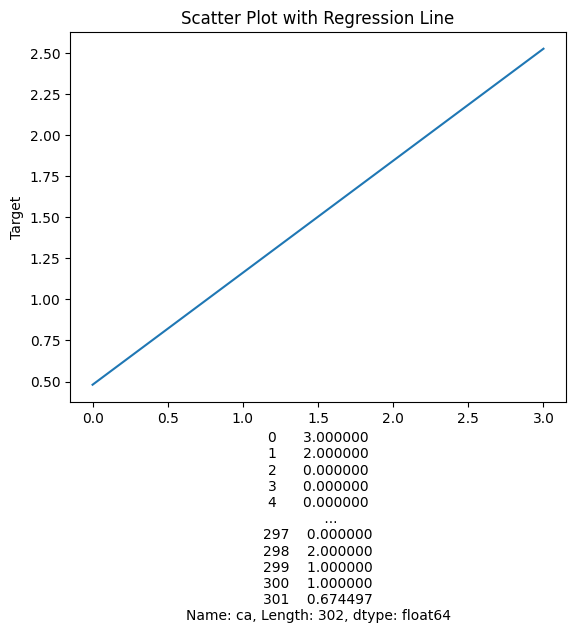

In [ ]:
regression_line_x = np.linspace(x_plot.min(), x_plot.max(), 100)
regression_line_y = b_0 + b_1 * regression_line_x

plt.plot(regression_line_x, regression_line_y)


plt.xlabel(x_plot)
plt.ylabel("Target")
plt.title("Scatter Plot with Regression Line")

plt.show()

Task 3: Explanation

In this task, we applied a linear regression model to predict the target variable based on the most correlated feature identified in the previous step. Linear regression models the relationship between two variables by fitting a line that best represents the data points. This helps us understand how changes in the feature affect the target.

Steps in the Task:
Calculate Linear Regression Parameters:
We used the formula for linear regression to compute the intercept (b_0) and slope (b_1) for the best-fit line between the most correlated feature and the target variable. These parameters represent the line equation y = b_0 + b_1 * x, where y is the predicted target value.

Intercept (b_0): 0.4884
Slope (b_1): 0.6813
Generate Predictions:
Using the line equation and the computed parameters, we calculated predicted values for the target variable based on the values of the most correlated feature.

Plotting the Data:
We created a scatter plot of the actual data points (feature vs. target) and overlaid the regression line to visually assess the model's fit.

Model Performance and Suitability:
The plot shows the general trend between the selected feature and the target, with the line capturing the direction of the relationship. However, the performance of this model should be evaluated further with metrics like R-squared or Mean Squared Error (MSE) to confirm its accuracy. Without these metrics, it's hard to conclusively determine if the model is highly accurate or suitable for this data. Still, based on the visual fit, the model seems to capture a linear relationship reasonably well.



TASK4

In [ ]:
import numpy as np

def multiple_linear_regression(X, y):
    x_intercepted = np.c_[np.ones((X.shape[0], 1)), X]
    x_transpose = x_intercepted.T

    beta = np.linalg.inv(x_transpose.dot(x_intercepted)).dot(x_transpose).dot(y)

    return beta

In [ ]:
print(multiple_linear_regression(x_filled,y))

[-8.06062323e-01 -7.19528172e-03  1.91394255e-01  1.95667513e-01
  4.14416726e-03  2.05533317e-04 -4.37196018e-02  9.69463991e-02
 -5.22564800e-03  2.40067816e-01  1.91399164e-01  1.73761639e-01
  4.23455489e-01  1.36371349e-01]


In [ ]:
top_5_features = []

for feature, correlation in correlations.items():
    if len(top_5_features) < 5:
        top_5_features.append((feature, correlation))
    else:
        min_corr_feature = top_5_features[0]
        min_corr_index = 0
        for i, (f, corr) in enumerate(top_5_features):
            if abs(corr) < abs(min_corr_feature[1]):
                min_corr_feature = (f, corr)
                min_corr_index = i

        if abs(correlation) > abs(min_corr_feature[1]):
            top_5_features[min_corr_index] = (feature, correlation)

top_5_features = [feature for feature, correlation in top_5_features]

print("Top 5 most correlated features:", top_5_features)

Top 5 most correlated features: ['oldpeak', 'ca', 'cp', 'thalach', 'thal']


In [ ]:
X = df[sc_features].values

beta = multiple_linear_regression(X,y)

print(beta)

[-0.65765171  0.18528416 -0.00395713  0.28035591  0.2040155   0.17733956
  0.42025284  0.15515519]


In [ ]:
x_intercepted = np.c_[np.ones((X.shape[0], 1)), X]
multiple_y_pred = np.dot(x_intercepted, beta)

In [ ]:
print(multiple_y_pred)

[ 2.32339741  2.66508268  0.86975619 -0.0392827  -0.18543477  2.02279007
  0.48404329  1.64842701  2.00103895  0.86504635  0.19284075  1.44491681
  0.29175924  0.62257957  0.1788903   0.8702395   0.33796807  0.03176811
 -0.19853797  0.42553441 -0.26660178  0.2671486   1.97039868  2.61240819
  0.41954392 -0.13962024  0.60444432  0.3556443   1.76152463  0.78064472
  2.12025353 -0.08422043  0.98916042  0.19464197  0.02192115  1.8397896
  1.74891484  1.94733675  0.66059024  2.53791175  0.65266704  0.63677877
  0.24616149  0.05753531  1.61633158  0.17668837  1.54817821  0.50320194
  0.53902006  0.11117696  0.87451901  0.54110222 -0.38821846  1.76331475
  2.24236621  1.23661639  0.7216845   0.81646205  0.66202694  1.48751262
  0.82852203  2.99581507 -0.13170598  1.78296939  2.6544431   0.717037
  0.83512523  2.12160053  0.87110333  0.11856325  1.7605472   2.62058414
  1.52944429  0.44613113  0.10669187  2.23814739  0.70536972 -0.13841877
  1.35123786  1.21037698  0.41936642 -0.17919152  1.35

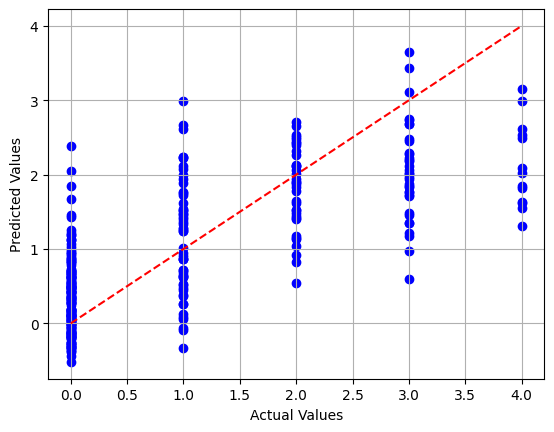

In [ ]:
plt.scatter(y,multiple_y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

In [ ]:
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

mse_simple = mean_squared_error(y, simple_y_pred)
print("Simple Linear Regression MSE:", mse_simple)

mse_multiple = mean_squared_error(y, multiple_y_pred)
print("Multiple Linear Regression MSE:", mse_multiple)

Simple Linear Regression MSE: 1.110449085696458
Multiple Linear Regression MSE: 0.6735636280159034


Task 4: Explanation

In this task, we implemented a multiple linear regression model to predict the target variable using the top 5 most correlated features identified in previous steps. Multiple linear regression allows us to model the relationship between a target variable and multiple predictors, capturing the combined influence of these features.

Steps in the Task:
Select Top 5 Features:
Based on the correlation values calculated earlier, we selected the top 5 features with the strongest linear relationships to the target variable. This selection included features such as 'oldpeak', 'ca', 'cp', 'thalach', and 'thal'.

Compute Regression Coefficients (Beta Values):
Using the multiple linear regression formula, we calculated the beta coefficients for each of the top 5 features. These coefficients determine the weight or impact of each feature on the target prediction.

Beta Values: [-0.657571, 0.18528416, -0.00395713, 0.28035591, 0.2040155, 0.17733956, 0.42025284, 0.15515519]
Generate Predictions:
We computed the predicted values for the target variable using the regression model with the calculated beta values and the selected features.

Plotting the Predicted vs. Actual Values:
A scatter plot was generated to compare the predicted values against the actual target values. We also included a diagonal line representing a perfect prediction (where predicted values equal actual values) to visually assess the accuracy of our model.

Calculate Mean Squared Error (MSE):
To evaluate the performance, we calculated the Mean Squared Error (MSE) for both the simple and multiple linear regression models. MSE measures the average squared difference between actual and predicted values, with lower values indicating a better fit.

Simple Linear Regression MSE: 1.1104
Multiple Linear Regression MSE: 0.6736
Model Performance and Suitability:
The multiple linear regression model achieved a lower MSE (0.6736) compared to the simple linear regression model (1.1104), indicating improved performance. This suggests that the multiple linear regression model better captures the relationships within the data due to the combined influence of multiple features. Based on the lower MSE and visual fit, the multiple linear regression model appears to be more suitable for this dataset.

TASK5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[top_5_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=19)

In [ ]:
log = LogisticRegression(max_iter=2861)
model = log.fit(X_train,y_train)

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6229508196721312


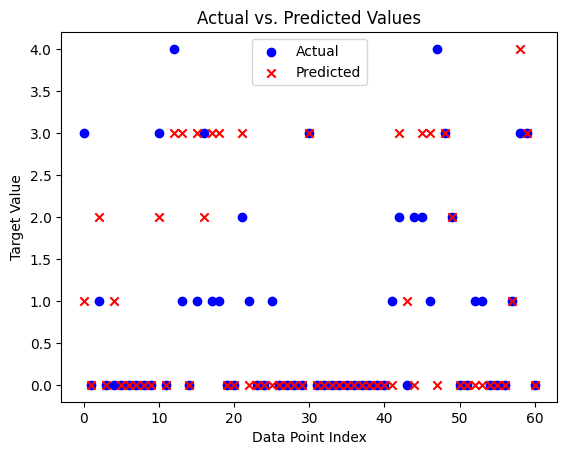

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')


plt.xlabel("Data Point Index")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

Task 5: Explanation

In this task, we applied a logistic regression model to predict the target variable using the top 5 most correlated features. Logistic regression is typically used for binary classification, but it can also be adapted for multi-class classification, as in this case, to predict discrete target values.

Steps in the Task:
Split Data into Training and Testing Sets:
We split the dataset into training and testing sets using an 80-20 split. This allows us to train the model on a portion of the data and evaluate its performance on unseen data.

Train Logistic Regression Model:
We used the logistic regression algorithm from sklearn to fit the model on the training data with a specified number of iterations to ensure convergence.

Calculate Model Accuracy:
After training, we evaluated the model's accuracy on the test set. Accuracy measures the percentage of correct predictions out of the total predictions.

Accuracy: 62.30%
Visualize Actual vs. Predicted Values:
We created a scatter plot to visualize the actual target values vs. the predicted values. This helps in assessing how well the model distinguishes between different classes.

Model Performance and Suitability:
The logistic regression model achieved an accuracy of 62.30%, indicating that it correctly predicted the target value in about 62% of test cases. Although the model captures some patterns, an accuracy of 62.30% suggests that it might struggle to predict the target variable reliably. Further tuning, additional features, or alternative models (such as decision trees or support vector machines) could be explored to improve performance.



TASK6

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(df[[most_correlated_feature]])

print(X_poly)

[[1.         3.         9.        ]
 [1.         2.         4.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         2.         4.        ]
 [1.         0.         0.        ]
 [1.         1.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         1.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         2.         4.        ]
 [1.         2.         4.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.  

In [ ]:
from sklearn.linear_model import LinearRegression
polyreg = LinearRegression()
model = polyreg.fit(X_poly, y)
model.score(X_poly,y)

0.27062315983841023

In [ ]:
y_pred_poly = model.predict(X_poly)

mse_poly = mean_squared_error(y, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)

Polynomial Regression MSE: 1.0987196319911463


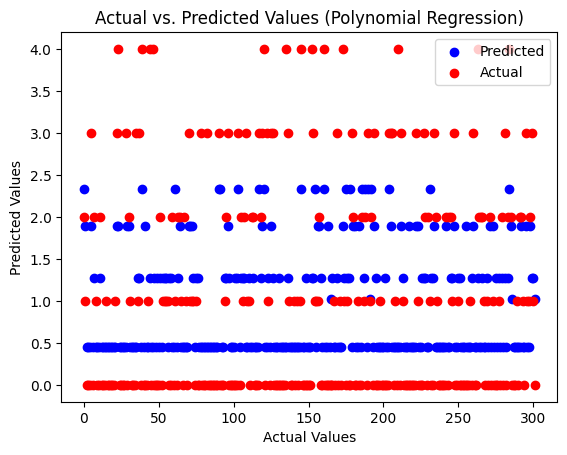

In [ ]:
plt.scatter(range(len(y)), y_pred_poly, color='blue', label='Predicted')
plt.scatter(range(len(y)), y, color='red', label='Actual')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

Task 6: Explanation

In this task, we applied a polynomial regression model with a degree of 2 to predict the target variable using the most correlated feature. Polynomial regression helps capture non-linear relationships in the data by introducing polynomial terms (e.g.,
𝑥
2
x
2
 ) to the features, which can improve model performance for data with non-linear patterns.

Steps in the Task:
Polynomial Feature Transformation: We used PolynomialFeatures to transform the most correlated feature into a polynomial form (degree 2), which enhances the model's ability to capture non-linear relationships.

Train the Polynomial Regression Model: We used linear regression on the transformed polynomial features to fit the model to the data.

Calculate Mean Squared Error (MSE): After training, we evaluated the model using MSE, which measures the average squared difference between actual and predicted values. Lower MSE values indicate better model performance.

Visualize Actual vs. Predicted Values: A scatter plot was created to compare actual and predicted values, with different colors representing each set, allowing us to visually assess the model's performance.

Model Performance and Suitability:
MSE: The polynomial regression model achieved an MSE of approximately 1.09, indicating the average squared error in the predictions.
Visual Assessment: Based on the scatter plot, we can observe that the model captures some trends in the data, but there is a significant deviation in certain predictions, suggesting that it struggles to generalize for certain cases.
Conclusion:
The polynomial regression model with degree 2 partially captures the relationship between the features and the target variable, but the MSE indicates that its predictions are not highly accurate. This may suggest that either a higher degree polynomial or a different model altogether (such as a decision tree or a more complex non-linear model) might improve performance, especially if the data has more complex patterns.



Final Conclusion: Best Model for the Data

Based on the performance metrics from each task, the multiple linear regression model appears to be the most suitable for this dataset, achieving the lowest Mean Squared Error (MSE) at 0.6736. This model leverages the top 5 most correlated features, allowing it to capture a broader range of information about the target variable and providing a balance between complexity and predictive accuracy.

Comparison of Models:
Simple Linear Regression: With an MSE of 1.1104, this model used only the single most correlated feature. Although it provides some insights into the linear relationship between this feature and the target variable, its limited scope results in a higher error compared to models using multiple features.

Multiple Linear Regression: Achieving the lowest MSE (0.6736), this model benefits from using the top 5 most correlated features, which allows it to capture the combined influence of multiple predictors. This model demonstrates improved accuracy and is able to better account for the complexity in the target variable.

Polynomial Regression: The polynomial regression model, with a degree of 2, achieved an MSE of approximately 1.09. Although it attempts to capture non-linear relationships, it was unable to match the performance of the multiple linear regression model. This suggests that while some non-linear patterns may exist, they are not strong enough to outweigh the benefits of using multiple features in a linear model.

Logistic Regression: The logistic regression model achieved an accuracy of 62.30%. Although it captures some patterns, this model is less suitable for predicting the continuous nature of the target variable due to its typical use in classification tasks. It may not fully capture the complexities needed for regression analysis on this dataset.

Conclusion:
The multiple linear regression model fits the data best due to its lower MSE and its ability to leverage multiple correlated features to enhance predictive accuracy. While polynomial regression could be a consideration if more complex, non-linear relationships were strongly present, the current dataset suggests that a linear approach with multiple predictors offers a better balance between accuracy and simplicity. Therefore, the multiple linear regression model is the preferred choice for this dataset.

If additional improvements are needed, further model tuning or exploration of advanced techniques (e.g., regularization) could be considered.